## Notebook to demonstrate data processing, TESS Sector 36 & 37 Luhman 16 AB

In [2]:
from AROMA import *
from AROMA.utils import *
from AROMA.config import *
import pandas as pd
from scipy.optimize import curve_fit

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir

data_path = '~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37_longPeriodsRemoved.txt'
data = pd.read_csv(data_path, header=0, delimiter='\t')
plotPath = join(homedir, 'plots')

fit_dir = join(homedir,'notebooks', 'periodSineFit_metadata')

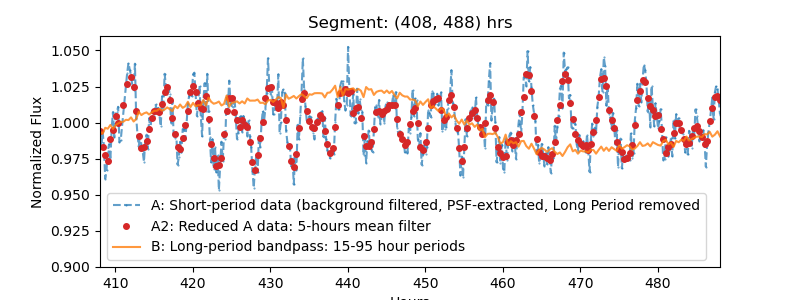

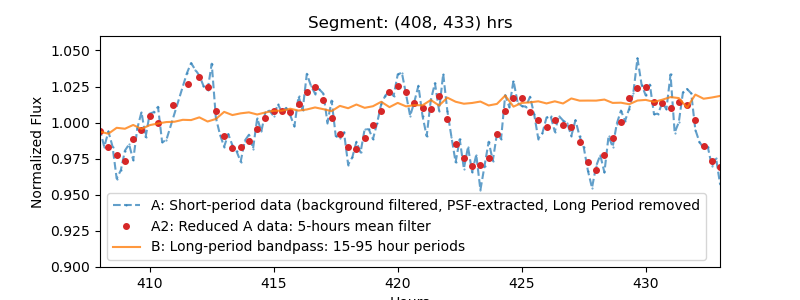

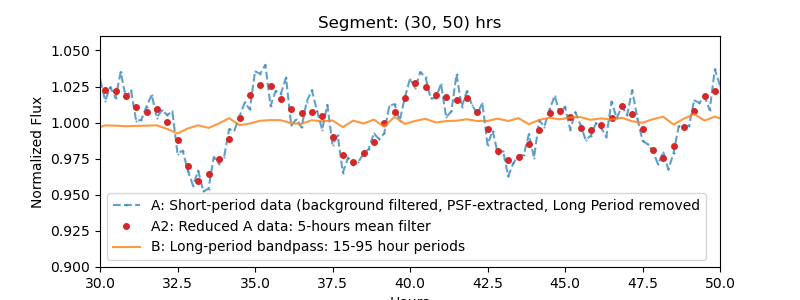

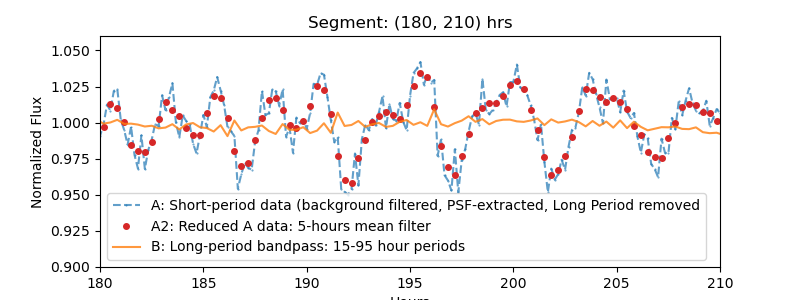

In [49]:
# %matplotlib inline
%matplotlib widget
time, lc = data.TIME, data.lc_corrected

# Reduce data by rebinning: 5-hour mean window
data_shortWin = data.rolling(window=5).mean().dropna()[::2]
timeroll, lcroll = data_shortWin.TIME, data_shortWin.lc_corrected

# Long-period data: 15-95 hours filter
LongPeriodData_path = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/longPeriod_FourierBandpassFILTER-window15-95_hour.txt"
time_info = LongPeriodData_path[-14:-4]
longPeriodData = pd.read_csv(LongPeriodData_path, skiprows=1, names=['time', 'flux'], delimiter='\t')
timelong, lclong = longPeriodData.time, longPeriodData.flux
  
segments = [(408, 488), (408, 433), (30,50), (180, 210)]
# segments = [(365, 445)]
# plt.close('all')
for seg in segments:
    plt.figure(figsize=(8, 3), dpi=100),
    
    plt.plot(time, lc, ls='--', marker='.', c='tab:blue', ms=1.0, alpha=0.7, label='A: Short-period data (background filtered, PSF-extracted, Long Period removed'),
    plt.plot(timeroll, lcroll, ls='', marker='o', c='tab:red', ms=4.0, label='A2: Reduced A data: 5-hours mean filter'),
    plt.plot(timelong, lclong, ls='-', c='tab:orange', alpha=0.8, label='B: Long-period bandpass: 15-95 hour periods')
    
    plt.xlim(seg), plt.xlabel('Hours'), plt.title("Segment: "+str(seg)+" hrs"), 
    plt.ylim((0.90, 1.06)), plt.ylabel('Normalized Flux')
    plt.legend()
    # plt.axhline(y=1, xmin=0, xmax=1200, c='k', alpha=0.4)
    
# write data files
save = True
outpath = "~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/"
lc_out_path = "luhman_16ab_sector36-37_5hr-reduced-data.txt"
if save: data_shortWin.to_csv(outpath+lc_out_path, sep='\t', index=False)  